<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.

## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

Try a variety of response variables. Start with **MEDV** (the `.target` attribute from the dataset load method).

In [35]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston() #how you load data in sklearn.

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [78]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [37]:
#print(boston.DESCR)

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [38]:
# Boston data is from SKlearn so it is clean

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [58]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
predictors = ["RM","TAX","AGE","CRIM"]

In [60]:
model = LinearRegression()

In [63]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
predictions  =  model.predict(X)
score        =  model.score(X, y)
print(score)   #here you have got your R square


0.7406426641094095


In [69]:
model.coef_   #why do we have so many coef? I thought there only be one set

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [70]:
model.intercept_   #only one intercept, more like it.

36.459488385089855

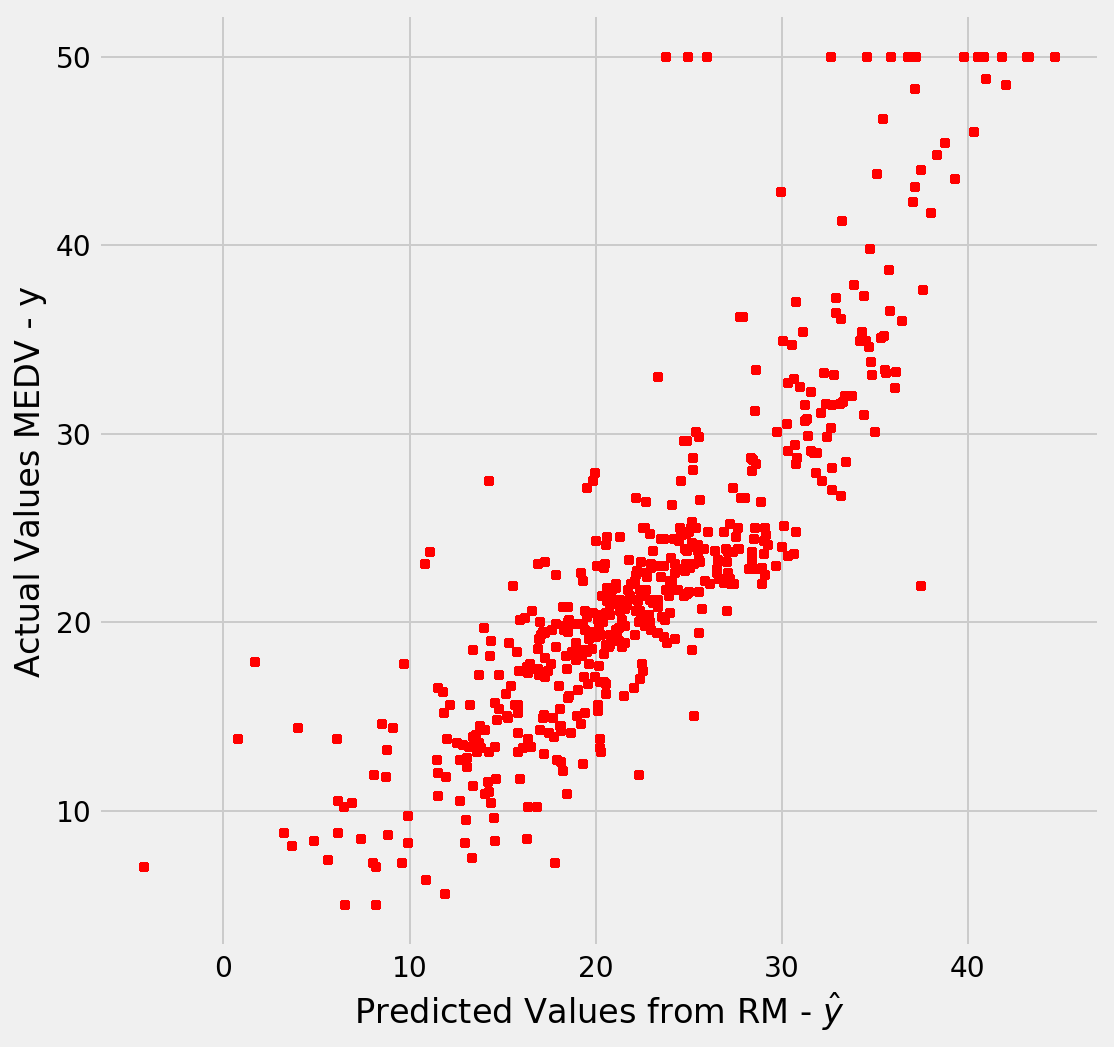

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()


In [66]:
print(model.coef)

AttributeError: 'LinearRegression' object has no attribute 'coef'

In [72]:
predictors = X[["RM","TAX","AGE","CRIM"]]

In [ ]:
y = target

In [80]:
model = LinearRegression()

In [81]:
model.fit(predictors,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
predictions = model.predict(predictors)

In [85]:
score = model.score(predictors,y)

In [86]:
print(score)   # compare to the previous r2, this one is much lower

0.5796329378833422


In [90]:
model.coef_

array([ 7.76912247, -0.00935683, -0.03421541, -0.12971406])

In [91]:
model.intercept_      # what does this minus mean in the real world?

-19.658440227452576

In [93]:
predictors.head()

,RM,TAX,AGE,CRIM
0,6.575,296.0,65.2,0.00632
1,6.421,242.0,78.9,0.02731
2,7.185,242.0,61.1,0.02729
3,6.998,222.0,45.8,0.03237
4,7.147,222.0,54.2,0.06905


In [88]:
from sklearn.metrics import mean_squared_error


In [89]:
np.sqrt(mean_squared_error(y,predictions)) 

5.957113462622608

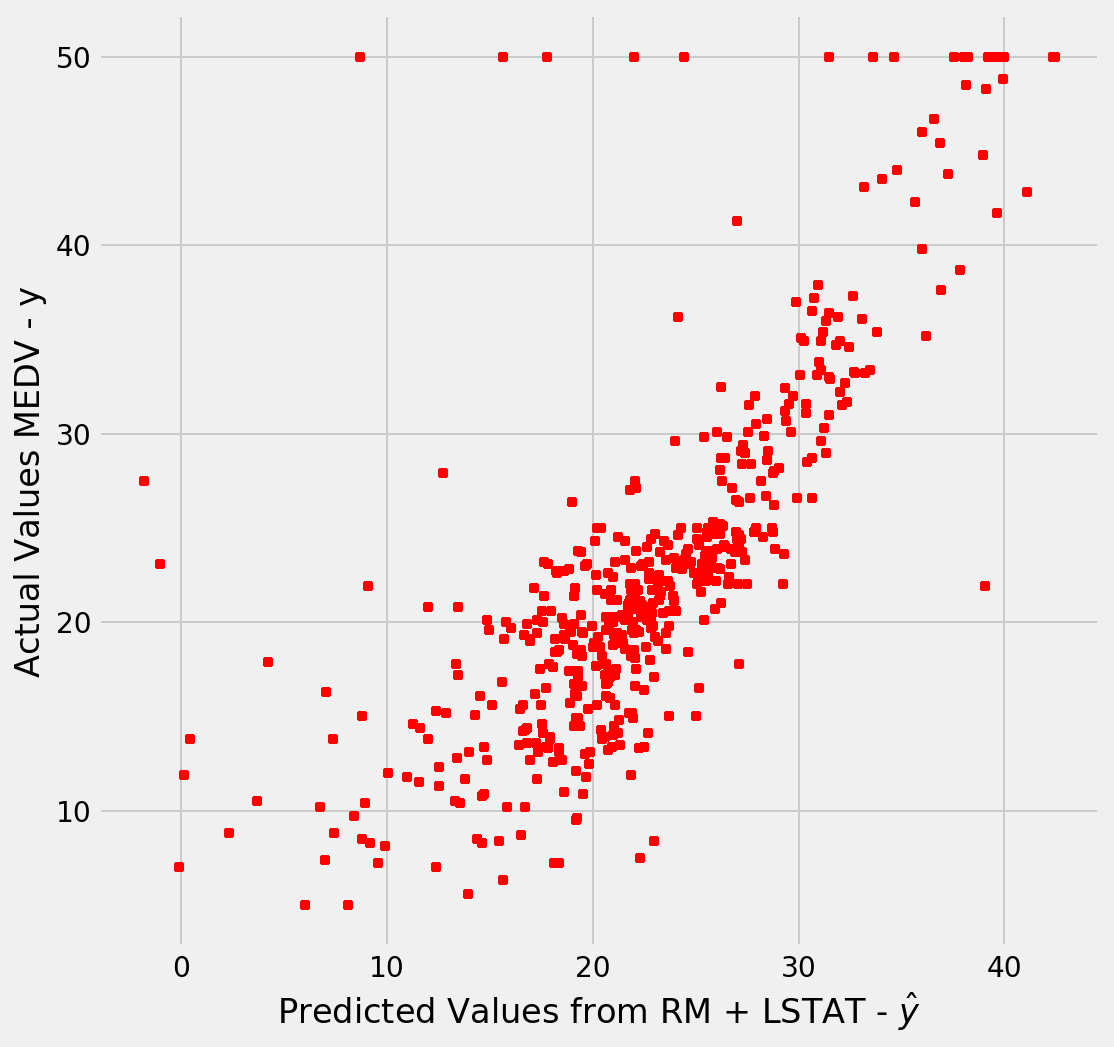

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()


In [39]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [40]:
predictors = ['CRIM', 'RM', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, 
                                            test_size=0.5, random_state=8)

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.6636463203503148

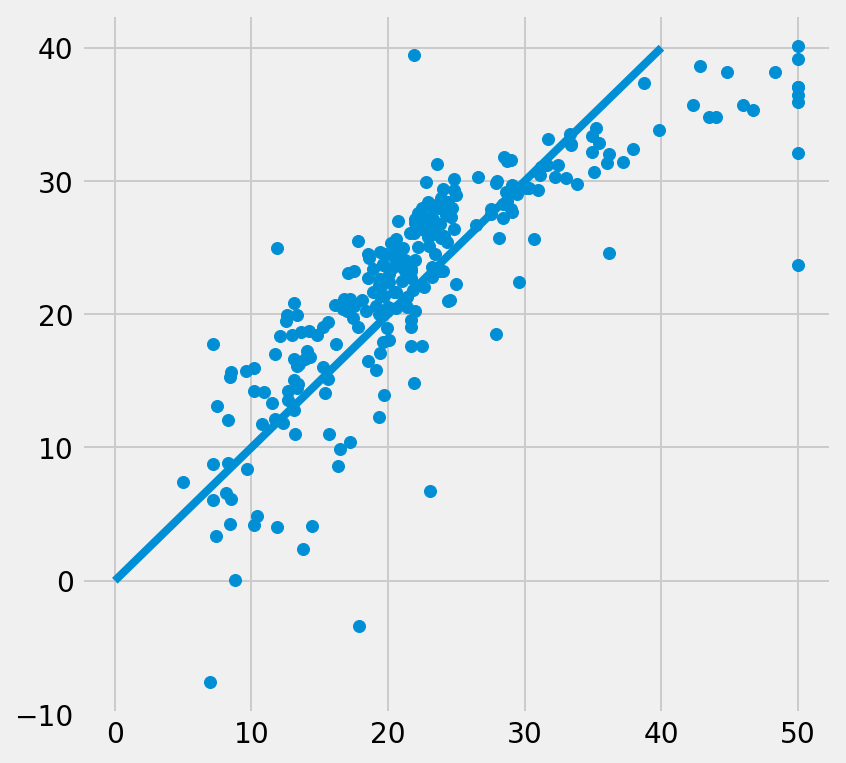

In [41]:
yhat = lr.predict(X_test)   #because we are in sklearn, .predict() is a build_in function
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat)
plt.plot([0,40],[0,40])
plt.show()

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X[predictors],
                                    y, test_size=0.3, random_state=8)

lr1 = LinearRegression()

lr1.fit(X_train,y_train)

lr1.score(X_test, y_test)

0.6162784690754468

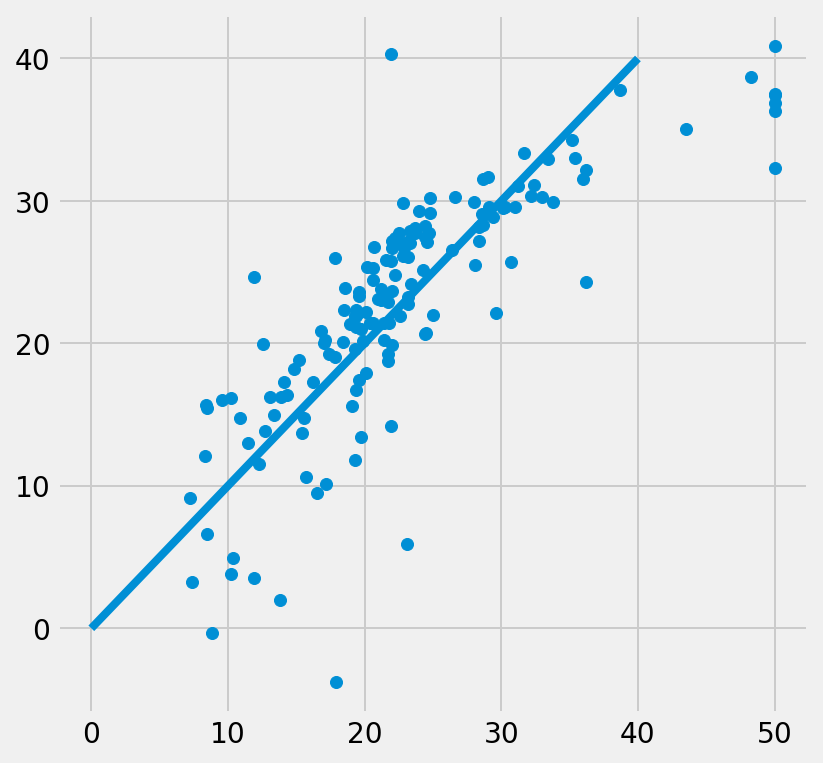

In [43]:
yhat = lr1.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat)
plt.plot([0,40],[0,40])
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X[predictors], 
                                    y, test_size=0.1, random_state=8)

lr2 = LinearRegression()

lr2.fit(X_train,y_train)

lr2.score(X_test, y_test)

0.5837369556472756

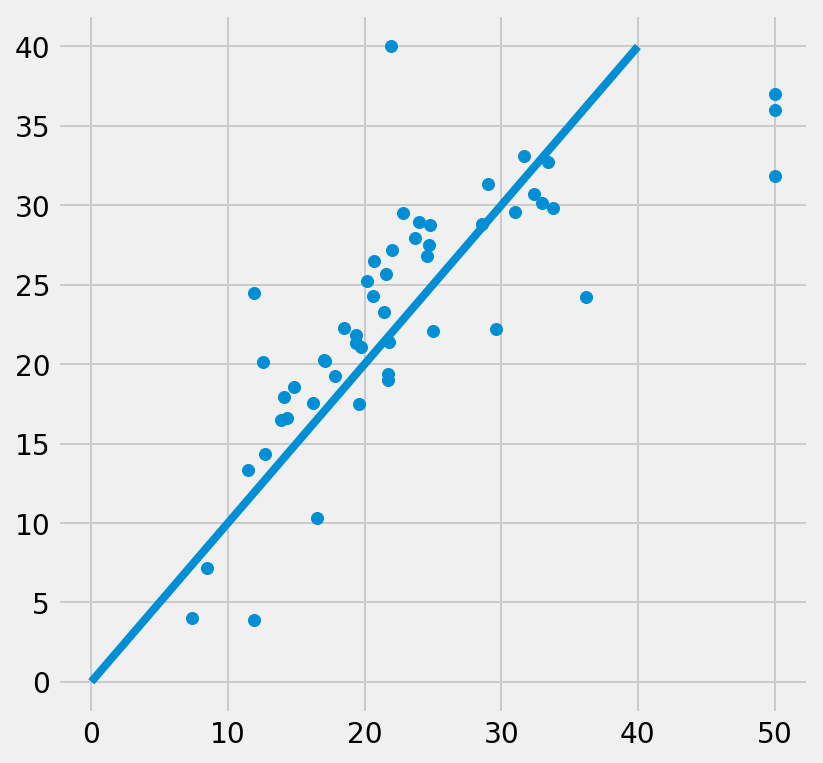

In [45]:
yhat = lr2.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat)
plt.plot([0,40],[0,40])
plt.show()

### 4. Try K-Fold cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [46]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn import metrics

In [47]:
# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K:', folds)
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores))
    print('Std CV R2:', np.std(scores))

------------------------------------

K: 5
Cross-validated scores: [ 0.64643662  0.70494178  0.44154394  0.08682092 -0.49941486]
Mean CV R2: 0.2760656794677655
Std CV R2: 0.44399911010241055
------------------------------------

K: 6
Cross-validated scores: [ 0.60629456  0.70763272  0.52029859  0.61899961 -0.33584065 -0.21629338]
Mean CV R2: 0.31684857607056294
Std CV R2: 0.4241505172479692
------------------------------------

K: 7
Cross-validated scores: [ 0.65523009  0.59556838  0.5358105   0.49507761  0.24551663 -0.69093403
  0.11913605]
Mean CV R2: 0.27934360353234594
Std CV R2: 0.43455307311536134
------------------------------------

K: 8
Cross-validated scores: [ 0.67248867  0.61782209  0.68506083  0.61035927  0.58782058 -0.28495311
 -1.03064528  0.03693312]
Mean CV R2: 0.23686076994423594
Std CV R2: 0.5828049393173526
------------------------------------

K: 9
Cross-validated scores: [ 0.69102409  0.60248887  0.68904755  0.45791113  0.56625835  0.60162648
 -0.05893951 -0.84085

In [48]:
# iterate through folds 5-10
for folds in range(5,11):
    
    kf = KFold(n_splits=folds,shuffle=True,random_state=8)
    
    print('------------------------------------\n')
    print('K:', folds)
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=kf)
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores))
    print('Std CV R2:', np.std(scores))

------------------------------------

K: 5
Cross-validated scores: [0.6123756  0.67345891 0.66933054 0.57556976 0.58942692]
Mean CV R2: 0.624032344579929
Std CV R2: 0.040439952231398194
------------------------------------

K: 6
Cross-validated scores: [0.59740024 0.64218293 0.71910307 0.66869242 0.54410415 0.52397073]
Mean CV R2: 0.6159089241907476
Std CV R2: 0.06840636106515899
------------------------------------

K: 7
Cross-validated scores: [0.60693626 0.63127536 0.77990237 0.63322706 0.60137083 0.61244855
 0.49312697]
Mean CV R2: 0.622612484992295
Std CV R2: 0.07791440289223446
------------------------------------

K: 8
Cross-validated scores: [0.5873519  0.66623926 0.67013617 0.72096109 0.6607571  0.61895156
 0.58256404 0.32224012]
Mean CV R2: 0.6036501555860685
Std CV R2: 0.11483512256148685
------------------------------------

K: 9
Cross-validated scores: [0.5937312  0.63912901 0.64030203 0.71187177 0.69594931 0.66636989
 0.47564168 0.81255139 0.21073828]
Mean CV R2: 0.605142

### 5. [Bonus] Optimize the $R^2$ score

Can you optimize your $R^2$ by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [49]:
from itertools import combinations

In [50]:
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

In [51]:
combs[110:120]

[('CRIM', 'INDUS', 'B'),
 ('CRIM', 'INDUS', 'LSTAT'),
 ('CRIM', 'CHAS', 'NOX'),
 ('CRIM', 'CHAS', 'RM'),
 ('CRIM', 'CHAS', 'AGE'),
 ('CRIM', 'CHAS', 'DIS'),
 ('CRIM', 'CHAS', 'RAD'),
 ('CRIM', 'CHAS', 'TAX'),
 ('CRIM', 'CHAS', 'PTRATIO'),
 ('CRIM', 'CHAS', 'B')]

In [52]:
len(combs)

8191

In [53]:
combs[100]

('CRIM', 'ZN', 'B')

In [54]:
# how to calculate the amount of possible combinations
from scipy.special import comb
sum([comb(13,i) for i in range(1,14)])

8191.0

In [55]:
from sklearn.metrics import r2_score

In [56]:
kf = KFold(n_splits=3,shuffle=True,random_state=1)

In [57]:
R2_results = {}
linreg = LinearRegression()
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print(i)
    subX = X[list(c)]
    scores = cross_val_score(linreg,subX,y,cv=kf)
    R2_results[c] = scores.mean()

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000


KeyboardInterrupt: 

In [ ]:
results = list(R2_results.items())
results = sorted(results, key=lambda x: x[1], reverse=True)

In [ ]:
for i in range(5):
    print(results[i])

In [ ]:
plt.hist([r[1] for r in results],bins=np.linspace(0,1,100))
plt.show()

### 5.1 Can you explain what could be wrong with this approach?

Even though we are cross-validating to get our R2 score for each model we're testing, 
we're trying thousands of different models and then choosing the one that has the
absolute highest R2.
Cross-validation does not eliminate the fact that this is a random sample from an
overall population, and the highest R2 out of these models is likely going to be 
higher than the ones near it by chance. Is the model with the best R2 *REALLY* 
better than the 2nd highest? 3rd highest?

This is an important point: you are the researcher and you should, whenever possible,
NOT rely on the computer's "brute force". This is why EDA is so important as well
as domain knowledge. As a human being can we eliminate variables that we know 
should not be used to build the model?

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [ ]:
# That might take a long time to run
# Check out variable relations
#import seaborn as sns
#sns.pairplot(X)
#plt.show()

In [ ]:
import patsy

df = X.copy()

# Add response to core DataFrame
df['MEDV'] = y

In [ ]:
# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("LSTAT ~ (AGE + RM + MEDV)**2", data=df, return_type="dataframe")

# "unravel" y
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [ ]:
# Build a new model and calculate the score:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: ", metrics.r2_score(y_test, predictions))